# The Basics of netCDF format

## What is NetCDF?

![NetCDFLogo](https://www.unidata.ucar.edu/images/logos/netcdf-150x150.png) netCDF stands for **Network Common Data Form** and it is a set of software libraries and machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data. It is also a community standard for sharing scientific data.  

[**NetCDF**](https://www.unidata.ucar.edu/software/netcdf/) is maintanied by [**Unidata**](https://www.unidata.ucar.edu/), one of the University Corporation for Atmospheric Research (UCAR)'s Community Programs (UCP). Unidata also supports and maintains netCDF programming interfaces for C, C++, Java, and Fortran. Programming interfaces are also available for Python, IDL, MATLAB, R, Ruby, and Perl. Thanks [**UCAR**](https://www.ucar.edu/)!!

## How is the netCDF format?

The properties that makes netCDF so useful are the following ones:

**Self-Describing** A netCDF file includes information about the data it contains.

**Portable** A netCDF file can be accessed by computers with different ways of storing integers, characters, and floating-point numbers.

**Sharable** One writer and multiple readers may simultaneously access the same netCDF file.

**Scalable** Small subsets of large datasets in various formats may be accessed efficiently through netCDF interfaces, even from remote servers.

**Appendable** Data may be appended to a properly structured netCDF file without copying the dataset or redefining its structure.

**Archivable** Access to all earlier forms of netCDF data will be supported by current and future versions of the software

## Exploring a netCDF File

Let's see most of these properties of a **netCDF** file by using actual data from the high-resolution Blended Analysis of daily Sea Surface Temperatute, [**NOAA OI SST V2 High Resolution Dataset**](https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2.highres.html#detail) Thanks [**NOAA**](https://www.noaa.gov/)!!

I have pre-downloaded the daily data from 2019. You can use this code for dowloading it:

`! wget ftp://ftp2.psl.noaa.gov/Datasets/noaa.oisst.v2.highres/sst.mnmean.nc `

Although there area several methods to read netCDF data in python, we will began with [netcdf4-python](https://unidata.github.io/netcdf4-python/netCDF4/), the unidata Python interface to the netCDF C library.

Let's import the libraries

In [1]:
import netCDF4
import numpy as np

In [2]:
fileExampleNC='./Data/sst.day.mean.2019.nc'

## Open the netCDF file

We will create **`SST`**, a `Dataset` object, representing an open netCDF file. The data is actually no read yet (just have a reference to the variable object with metadata).

In [3]:
ncDS = netCDF4.Dataset(fileExampleNC)
type(ncDS)

netCDF4._netCDF4.Dataset

And here it comes the **Self-Describing** propierty of the netCDF format, with all information about the data it contains. The information provides depend on the particular data set, as we will see for Argo data.

Printing the object gives you summary information

In [4]:
print(ncDS)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.5
    title: NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surface Temperature (OISST) Analysis, Version 2.1
    institution: NOAA/National Centers for Environmental Information
    source: NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temperature-optimum-interpolation/v2.1/access/avhrr/
    References: https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2.highres.html
    dataset_title: NOAA Daily Optimum Interpolation Sea Surface Temperature
    version: Version 2.1
    comment: Reynolds, et al.(2007) Daily High-Resolution-Blended Analyses for Sea Surface Temperature (available at https://doi.org/10.1175/2007JCLI1824.1). Banzon, et al.(2016) A long-term record of blended satellite and in situ sea-surface temperature for climate monitoring, modeling and environmental studies (available at https://doi.org/10.5194/essd-8-165-2016). Huang et al. (2020) Impr

## Exploring a netCDF File with xarray

<img src="http://xarray.pydata.org/en/stable/_static/dataset-diagram-logo.png" alt="xarray logo" width="200"/> Before continuing with the descrption of the netCDF format, we would swtich to **xarray** . 

Although **netCDF4-python** provides a lower level interface for working with netCDF in Python, xarray use netCDF4-python internally, it is more user friendly than netCDF4. Additionally xarray is used by [*argopy*](https://github.com/euroargodev/argopy), the Argo data python library that aims to ease Argo data access, and that is used in te Argo Online School.  xarray does not yet support all of netCDF4-python's features, such as modifying files on-disk, but this is beyond the objective of this school.

A brief introduction for xarray [here](https://rabernat.github.io/research_computing/xarray.html)

## Open the netCDF file with xarray

We will create **`xrDS`**, a `Dataset` object, representing an open netCDF file. The data is actually no read yet, it is just have a reference to the variable object with metadata.

First, we have to import the xarray libray, and netcdf4 and matplotlib, since both are used internally by xarray

In [5]:
import netCDF4
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
xrDS = xr.open_dataset(fileExampleNC)
type(xrDS)

xarray.core.dataset.Dataset

**Printing the object gives you summary information**

In [7]:
print(xrDS)

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 365)
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01 2019-01-02 ... 2019-12-31
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    institution:    NOAA/National Centers for Environmental Information
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...


And again here it comes the **Self-Describing** propierty of the netCDF format, with all information about the data it contains. The information provides depend on the particular data set, as we will see for Argo data.

**However xarray has implemente a more user-friendly way of accessing the meta data stored in te Dataset**

In [8]:
xrDS

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 365)
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01 2019-01-02 ... 2019-12-31
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    institution:    NOAA/National Centers for Environmental Information
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...

**All these metainformation can be used for any purpose**
- A list of all the data variables in the netCDF file

In [9]:
xrDS.data_vars

Data variables:
    sst      (time, lat, lon) float32 ...

- A list of some attributes for all the variables and coordinates in the data set:

In [10]:
for d in xrDS.data_vars:
    print(xrDS.data_vars[d].long_name)
    print(xrDS.data_vars[d].dims)

Daily Sea Surface Temperature
('time', 'lat', 'lon')


In [11]:
for d in xrDS.coords:
    print(xrDS.coords[d].long_name,xrDS.dims[d])

Time 365
Latitude 720
Longitude 1440


- Use of the general attributes of the Dataset [in two ways]

In [12]:
print('We are exlploring', xrDS.attrs['dataset_title'] ,'from ',xrDS.attrs['source'], 'in its version', xrDS.attrs['version'])

We are exlploring NOAA Daily Optimum Interpolation Sea Surface Temperature from  NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temperature-optimum-interpolation/v2.1/access/avhrr/ in its version Version 2.1


In [13]:
print('We are exlploring', xrDS.dataset_title ,'from ',xrDS.source, 'in its version', xrDS.version)

We are exlploring NOAA Daily Optimum Interpolation Sea Surface Temperature from  NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temperature-optimum-interpolation/v2.1/access/avhrr/ in its version Version 2.1


## Accessing a netCDF data variable
- data variable objects stored by name in **`data_vars`** dict.
- print the variable yields summary info: range, long_name for the variable, dimesions, fillvalue ,... All the information neccessary used to use the variable

In [14]:
xrDS.data_vars['sst']

<xarray.DataArray 'sst' (time: 365, lat: 720, lon: 1440)>
[378432000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01 2019-01-02 ... 2019-12-31
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875
Attributes:
    long_name:     Daily Sea Surface Temperature
    units:         degC
    valid_range:   [-3. 45.]
    precision:     2.0
    dataset:       NOAA High-resolution Blended Analysis
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Observations
    actual_range:  [-1.8  36.79]

**We can just extract one sigle Data variable.**
In the case of the NOAA Daily Optimum Interpolation Sea Surface Temperature, there is only one Data variable, SST, but it is useful for later when we use the argo data
- print the variable yields summary info: range, long_name for the variable, dimesions, fillvalue ,... All the information neccessary used to use the variable
- xarray is so clever that it will matein its coordinates, time, lat and lon in this case.

In [15]:
# Just focus on Sea Surface temperature variable
sst = xrDS.sst
sst

<xarray.DataArray 'sst' (time: 365, lat: 720, lon: 1440)>
[378432000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01 2019-01-02 ... 2019-12-31
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875
Attributes:
    long_name:     Daily Sea Surface Temperature
    units:         degC
    valid_range:   [-3. 45.]
    precision:     2.0
    dataset:       NOAA High-resolution Blended Analysis
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Observations
    actual_range:  [-1.8  36.79]

It is also possible to use the attributes of a data variblle

In [16]:
print(sst.long_name+' from the '+sst.dataset +' is in '+sst.units)

Daily Sea Surface Temperature from the NOAA High-resolution Blended Analysis is in degC


In [17]:
sst.sel(lat=(28),method='nearest').mean(dim=('time'))

/Users/pvb/miniconda3/envs/AOS/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'sst' (lon: 1440)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    lat      float32 28.125
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875

## Using the data
Let's actually use the data, firt to see the time series of SST near the, beatiful, Canary Islands, and after that the mean global SST

In [18]:
#In the metadata there is not reference for the grid resolution
sst.lon[0]-sst.lon[1]

<xarray.DataArray 'lon' ()>
array(-0.25, dtype=float32)

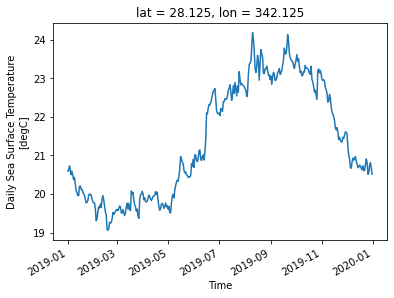

In [19]:
sst.sel(lon=(360-18), lat=28, method='nearest').plot()

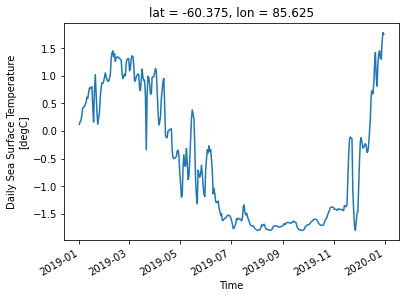

In [23]:
#28N 18W
sst[:,(90+28),(360-18)].plot()

/Users/pvb/miniconda3/envs/AOS/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


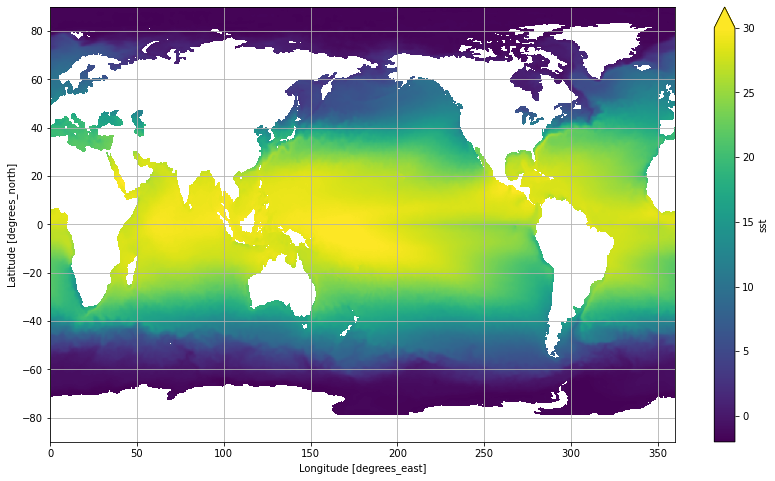

In [24]:
fig, ax = plt.subplots(figsize=(14,8))
sst.mean(dim='time').plot(vmin=-2, vmax=30)
ax.grid()

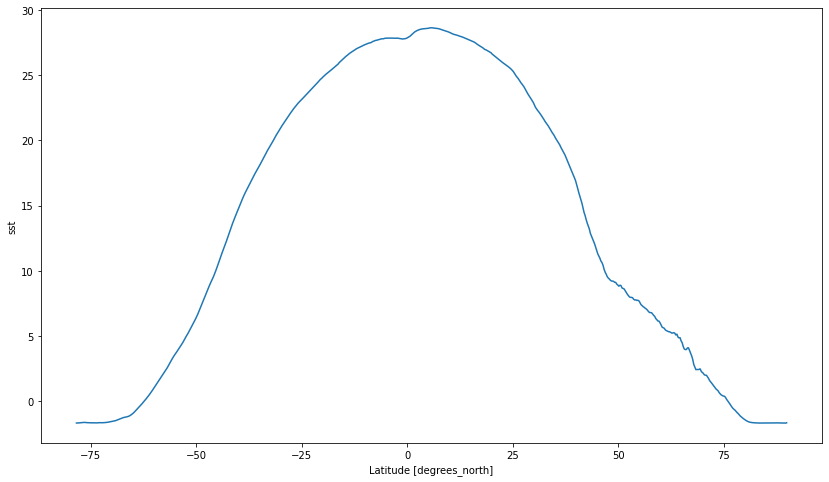

In [25]:
fig, ax = plt.subplots(figsize=(14,8))
sst.mean(dim=('time', 'lon')).plot()

## Remote data access via openDAP

With OPeNDAP, you can access data using an URL rather than a local path. For xarray it is like having the file locally, the only difference is that you provide a differente path.

OPeNDAP stand for *Open-source Project for a Network Data Access Protocol* [More information here](https://earthdata.nasa.gov/collaborate/open-data-services-and-software/api/opendap)

https://www.psl.noaa.gov/data/gridded_help/using_dods.html

In [29]:
dap_url="http://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.2019.nc"
dataOP = xr.open_dataset(dap_url)
dataOP

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 365)
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01 2019-01-02 ... 2019-12-31
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:                     CF-1.5
    title:                           NOAA/NCEI 1/4 Degree Daily Optimum Inter...
    institution:                     NOAA/National Centers for Environmental ...
    source:                          NOAA/NCEI https://www.ncei.noaa.gov/data...
    References:                      https://www.psl.noaa.gov/data/gridded/da...
    dataset_title:                   NOAA Daily Optimum Interpolation Sea Sur...
    version:                         Version 2.1
    comment:                         Reynolds, et al.(2007) Daily High-Resolu...
    DODS_EXTRA.Unlimited_Dimension:  time

The only difference in accesing the data via OPeNDAP is that you can not plot it explicitily, i.e., something like:

`dataOP.sel(lon=(360-18), lat=28, method='nearest').plot()`

but you have to create the datasets to later plot them:

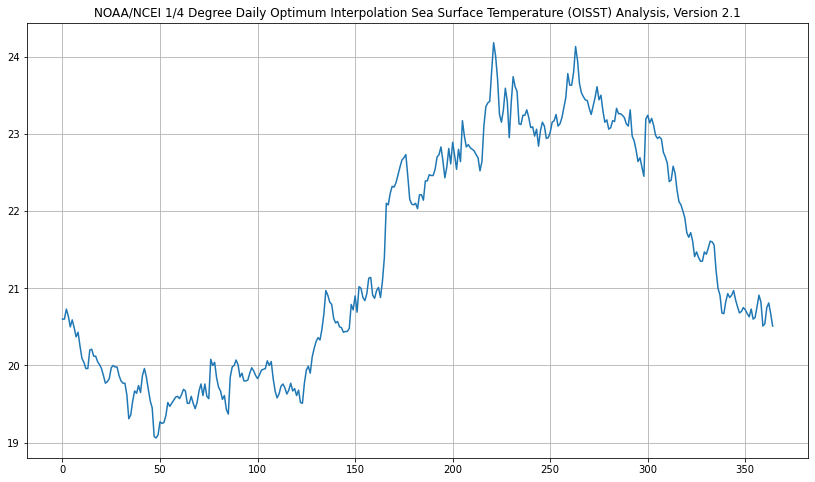

In [33]:
dataOPsubsampled=dataOP.sel(lon=(360-18), lat=28, method='nearest')
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(dataOPsubsampled.sst)
ax.set_title(dataOP.title)
ax.grid()

## Closing your netCDF file
It's good to close netCDF files, but not actually necessary when Dataset is open for read access only.

In [25]:
xrDS.close()